In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:/train.csv')
data.loc[(data['Age'] < 18), 'Sex'] = 'child'

In [ ]:
data_surv = data.query('Survived==1').drop(columns='Survived')
data_not_surv = data.query('Survived==0').drop(columns='Survived')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",child,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Context

При анализе дети (пассажиры в возрасте до 18 лет) выделены в отдельный пол child.

# Data quality assessment

In [20]:
data.count() - 100000

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age            -3292
SibSp              0
Parch              0
Ticket         -4623
Fare            -134
Cabin         -67866
Embarked        -250
dtype: int64

отсутствуют данные о возрасте: 3292 (3,3%)

отсутствуют данные о билете: 4623 (4,6%)

отсутствуют данные о каюте: 67866 (67,9%)

# Data exploration

Распределение пассажиров по возрасту

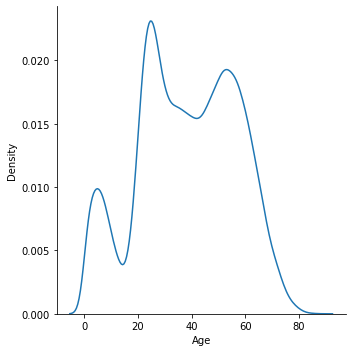

In [97]:
sns.displot(data=data,x='Age',kind='kde')

Распределение пассажиров по возрасту (с учетом пола)

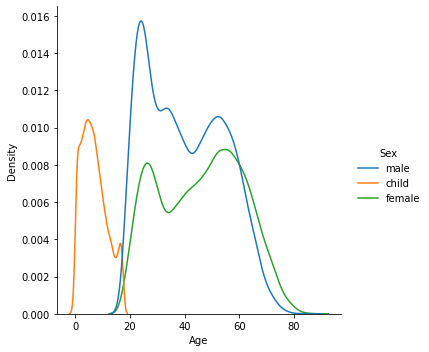

In [96]:
sns.displot(data=data,x='Age',hue='Sex',kind='kde')

Группировка данных по возрасту

In [31]:
data.groupby('Age').count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.08,39,39,39,39,39,39,39,38,39,2,39
0.17,67,67,67,67,67,67,67,67,67,5,67
0.25,68,68,68,68,68,68,68,66,68,3,68
0.33,53,53,53,53,53,53,53,53,53,2,53
0.42,62,62,62,62,62,62,62,61,62,5,62
...,...,...,...,...,...,...,...,...,...,...,...
83.00,9,9,9,9,9,9,9,9,9,3,9
84.00,3,3,3,3,3,3,3,3,3,0,3
85.00,4,4,4,4,4,4,4,3,4,1,4


Данные о самом пожилом пассажире

In [32]:
data.query('Age==87')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55085,55085,1,2,"Steelman, Rose",female,87.0,0,2,27657,35.8,NaN,C


Распределение числа пассажиров по выживаемости

0    0.57226
1    0.42774
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Survived', ylabel='count'>

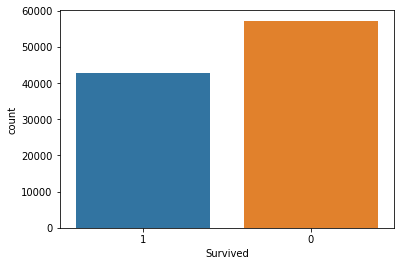

In [82]:
print(data['Survived'].value_counts(normalize=True))
sns.countplot(x='Survived',data=data,order=[1,0])

Распределение числа пассажиров по полу

male      0.50761
female    0.37322
child     0.11917
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='count'>

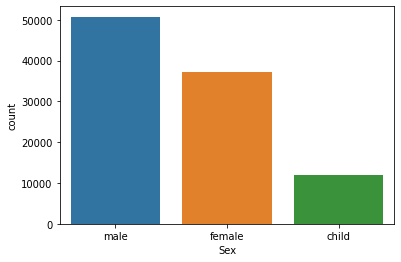

In [85]:
print(data['Sex'].value_counts(normalize=True))
sns.countplot(x='Sex',data=data,order=['male','female','child'])

Распределение числа пассажиров по классам

3    0.41006
1    0.30315
2    0.28679
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

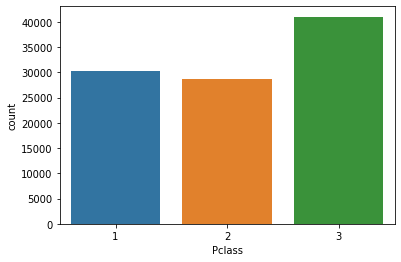

In [105]:
print(data['Pclass'].value_counts(normalize=True))
sns.countplot(x='Pclass',data=data,order=[1,2,3])

Распределение числа пассажиров по выживаемости (с учетом пола)

Survived  Sex   
0         male      0.704697
          female    0.178136
          child     0.117167
1         female    0.634217
          male      0.243933
          child     0.121850
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Survived', ylabel='count'>

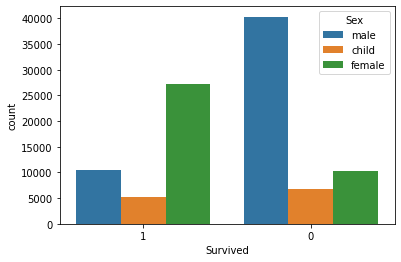

In [100]:
print(data.groupby('Survived')['Sex'].value_counts(normalize=True))
sns.countplot(x='Survived',hue='Sex',data=data,order=[1,0])

Распределение числа пассажиров по выживаемости (с учетом класса)

Survived  Pclass
0         3         0.539353
          2         0.238039
          1         0.222609
1         1         0.410904
          2         0.352013
          3         0.237083
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Survived', ylabel='count'>

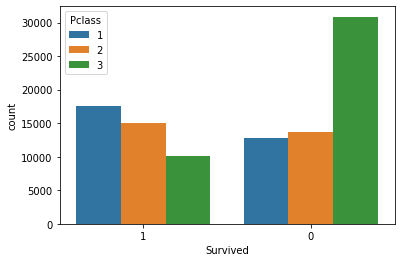

In [106]:
print(data.groupby('Survived')['Pclass'].value_counts(normalize=True))
sns.countplot(x='Survived',hue='Pclass',data=data,order=[1,0])

Распределение числа пассажиров по полу (с учетом выживаемости)

Sex     Survived
child   0           0.562642
        1           0.437358
female  1           0.726864
        0           0.273136
male    0           0.794448
        1           0.205552
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='count'>

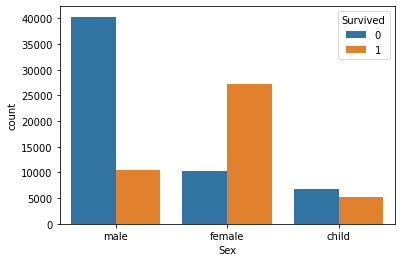

In [84]:
print(data.groupby('Sex')['Survived'].value_counts(normalize=True))
sns.countplot(x='Sex',hue='Survived',data=data,order=['male','female','child'])

Распределение числа пассажиров по полу (с учетом класса)

Sex     Pclass
child   3         0.570446
        2         0.338760
        1         0.090795
female  1         0.418225
        2         0.335941
        3         0.245834
male    3         0.493154
        1         0.268395
        2         0.238451
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='count'>

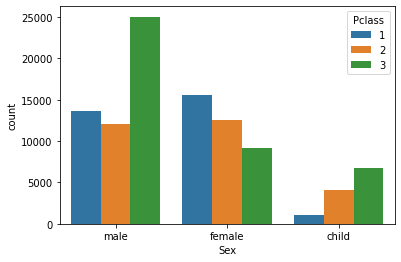

In [107]:
print(data.groupby('Sex')['Pclass'].value_counts(normalize=True))
sns.countplot(x='Sex',hue='Pclass',data=data,order=['male','female','child'])

Распределение числа пассажиров по классам (с учетом выживаемости)

Pclass  Survived
1       1           0.579779
        0           0.420221
2       1           0.525018
        0           0.474982
3       0           0.752695
        1           0.247305
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

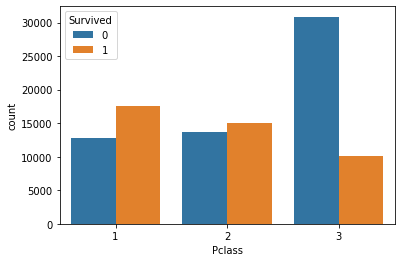

In [110]:
print(data.groupby('Pclass')['Survived'].value_counts(normalize=True))
sns.countplot(x='Pclass',hue='Survived',data=data,order=[1,2,3])

Распределение числа пассажиров по классам (с учетом пола)

Pclass  Sex   
1       female    0.514894
        male      0.449414
        child     0.035692
2       female    0.437184
        male      0.422051
        child     0.140765
3       male      0.610472
        female    0.223748
        child     0.165781
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

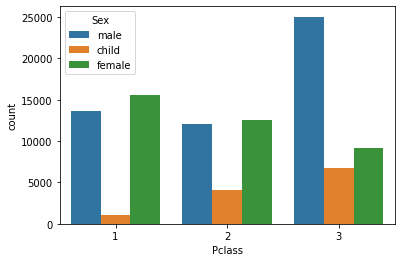

In [111]:
print(data.groupby('Pclass')['Sex'].value_counts(normalize=True))
sns.countplot(x='Pclass',hue='Sex',data=data,order=[1,2,3])

Распределение числа пассажиров по выживаемости (с учетом пола по классам)

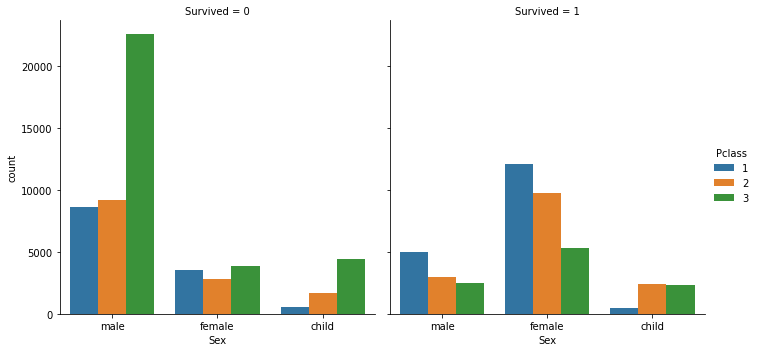

In [72]:
sns.catplot(x='Sex',hue='Pclass',col='Survived',data=data,kind='count',order=['male','female','child'])

Распределение числа пассажиров по выживаемости (с учетом класса по пола)

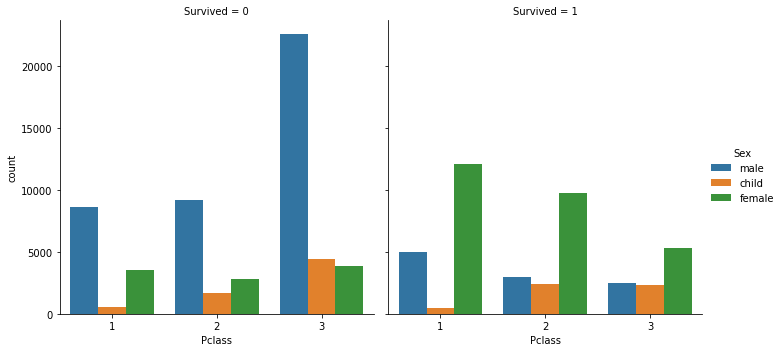

In [120]:
sns.catplot(x='Pclass',hue='Sex',col='Survived',data=data,kind='count',order=[1,2,3])

Распределение числа пассажиров по полу (с учетом выживаемости по классам)

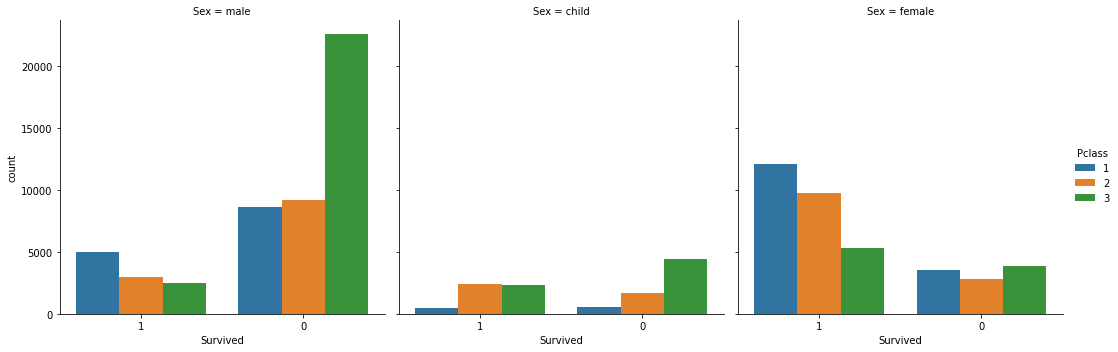

In [119]:
sns.catplot(x='Survived',hue='Pclass',col='Sex',data=data,kind='count',order=[1,0])

Распределение числа пассажиров по полу (с учетом классов по выживаемости)

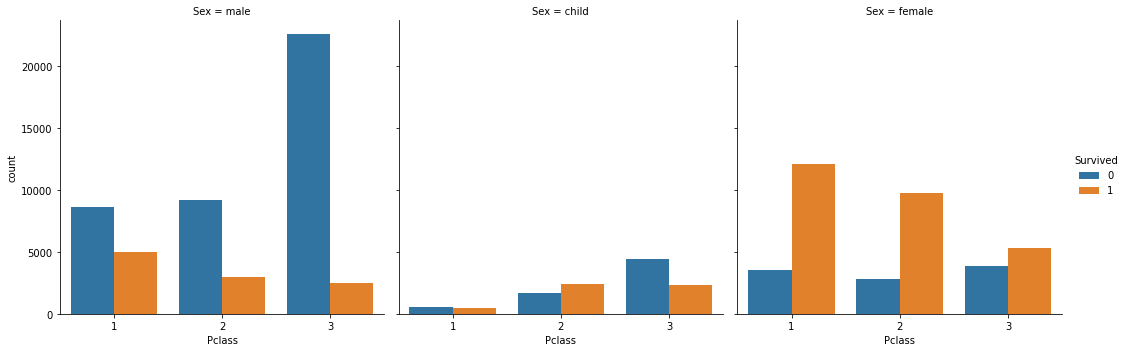

In [121]:
sns.catplot(x='Pclass',hue='Survived',col='Sex',data=data,kind='count',order=[1,2,3])

Распределение числа пассажиров по классам (с учетом выживаемости по полу)

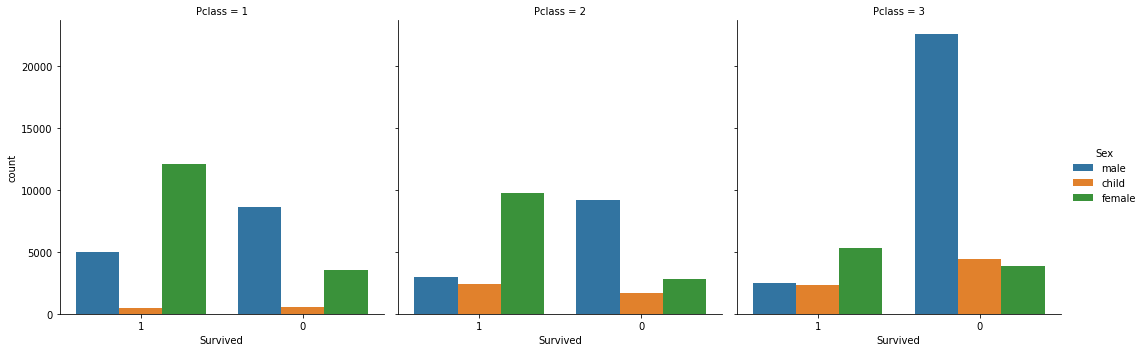

In [118]:
sns.catplot(x='Survived',hue='Sex',col='Pclass',data=data,kind='count',order=[1,0])

Распределение числа пассажиров по классам (с учетом пола по выживаемости)

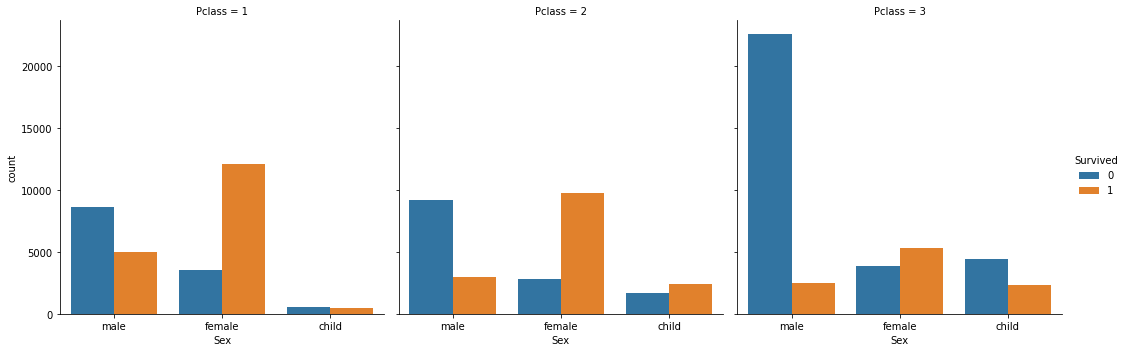

In [117]:
sns.catplot(x='Sex',hue='Survived',col='Pclass',data=data,kind='count',order=['male','female','child'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

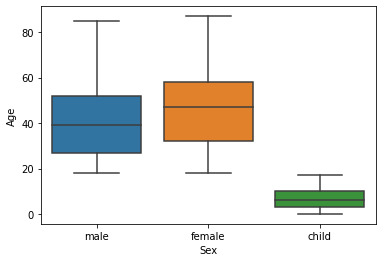

In [74]:
sns.boxplot(x='Sex',y='Age',data=data,order=['male','female','child'])

# Summary

Доля пассажиров, путешестовавших без родственников: 73,3%

Возраст самого молодого пассажира: 1 месяц

Самый пожилой пассажир: Rose Steelman, 87 лет, выжила

Наиболее часто встречающийся возраст: 25 лет

Доля выживших: 42.8%

Доля пассажиров по полу: мужчин - 50.8%, женщин - 37.3%, детей - 11.9%

Доля выживших по полу: мужчин - 20.6%, женищин - 72.7%, детей - 43.7%